<a href="https://colab.research.google.com/github/vamsee2309/vamsee2309/blob/main/Business_Case_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
csv_path = '/content/drive/MyDrive/netflix_dataset.csv'
data  = pd.read_csv(csv_path)

 ***Importing Libraries and Loading the Dataset***

In [4]:
num_rows = data.shape[0]
print(f"Number of rows: {num_rows}")

sample_data = data.head(5)
print("\nSample Data:")
display(sample_data)
num_records = data.size

Number of rows: 8807

Sample Data:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# ***DEFINING PROBLEM STATEMENTS AND ANALYSING BASIC METRICS***


***Exploring the Dataset***

In [5]:
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Number of rows: 8807
Number of columns: 12


In [6]:
print(data.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [7]:
print(data.describe())

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


***Analyzing Content Availability in Different Countries***



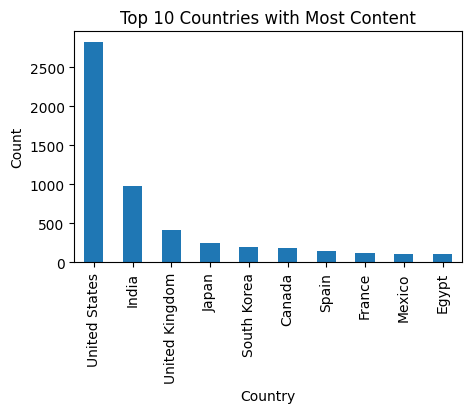

In [8]:
country_counts = data['country'].value_counts()
top_10_countries = country_counts.head(10)
plt.figure(figsize=(5, 3))
top_10_countries.plot(kind='bar')
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

***Changing Number of Movies Released per Year***



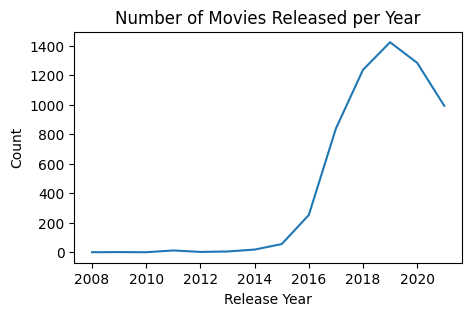

In [9]:
data['release_year'] = pd.to_datetime(data['date_added']).dt.year
movies_per_year = data[data['type'] == 'Movie'].groupby('release_year').size()
plt.figure(figsize=(5, 3))
movies_per_year.plot(kind='line')
plt.title('Number of Movies Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

 ***Comparison of TV Shows vs. Movies***

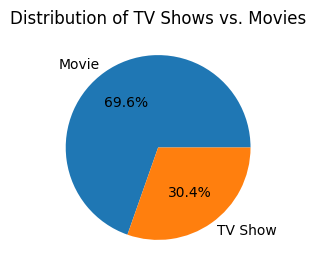

In [10]:
content_type_counts = data['type'].value_counts()
plt.figure(figsize=(3, 3))
content_type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of TV Shows vs. Movies')
plt.ylabel('')
plt.show()

***Finding the Best Time to Launch a TV Show***

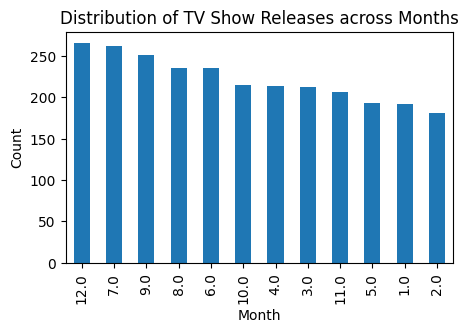

In [11]:
data['month_added'] = pd.to_datetime(data['date_added']).dt.month
tv_shows_per_month = data[data['type'] == 'TV Show']['month_added'].value_counts()

plt.figure(figsize=(5, 3))
tv_shows_per_month.plot(kind='bar')
plt.title('Distribution of TV Show Releases across Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

***Analysis of Actors/Directors of Different Types of Shows/Movies***

In [12]:
actor_counts = data['cast'].str.split(', ').explode().value_counts()
director_counts = data['director'].str.split(', ').explode().value_counts()

In [13]:
top_10_actors = actor_counts.head(10)
print("Top 10 Actors:")
print(top_10_actors)

Top 10 Actors:
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: cast, dtype: int64


In [14]:
top_10_directors = director_counts.head(10)
print("\nTop 10 Directors:")
print(top_10_directors)


Top 10 Directors:
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Name: director, dtype: int64


***Focus on TV Shows vs. Movies in Recent Years***

<Figure size 500x300 with 0 Axes>

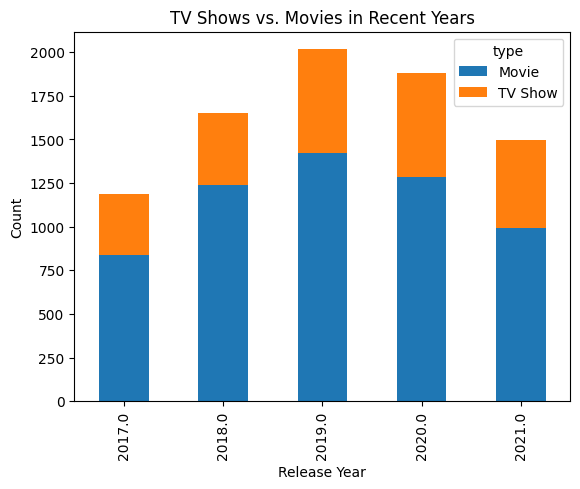

In [15]:
content_per_year = data.groupby(['release_year', 'type']).size().unstack()
recent_years = content_per_year.index[-5:]

plt.figure(figsize=(5, 3))
content_per_year.loc[recent_years].plot(kind='bar', stacked=True)
plt.title('TV Shows vs. Movies in Recent Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# ***OBSERVATIONS ON THE SHAPE OF DATA, DATA TYPES OF ALL THE ATTRIBUTES, CONVERSION OF CATEGORICAL ATTRIBUTES TO 'CATEGORY', MISSING VALUE DETECTION, STATISTICAL SUMMARY***


***Analyzing Content Availability in Different Countries***

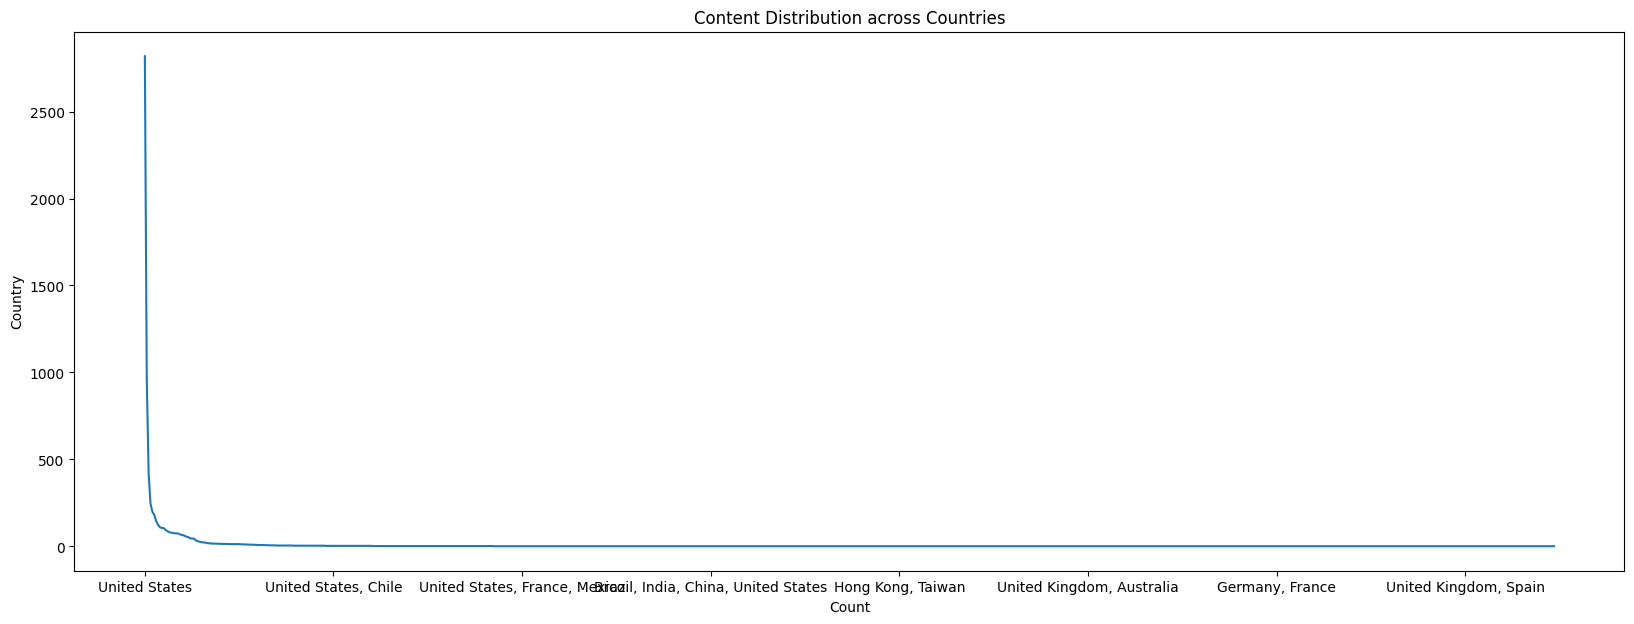

In [16]:
content_by_country = data['country'].value_counts()
plt.figure(figsize=(20, 7))
content_by_country.plot(kind='line')
plt.title('Content Distribution across Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

***Number of Movies Released per Year***


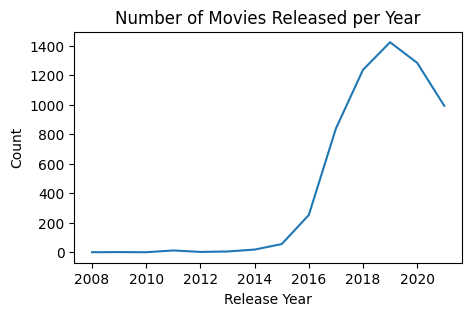

In [17]:
data['release_year'] = pd.to_datetime(data['date_added']).dt.year
movies_per_year = data[data['type'] == 'Movie']['release_year'].value_counts().sort_index()

plt.figure(figsize=(5, 3))
movies_per_year.plot(kind='line')
plt.title('Number of Movies Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

***Comparison of TV Shows vs. Movies***

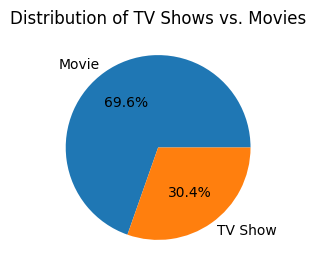

In [18]:
content_types = data['type'].value_counts()

plt.figure(figsize=(3, 3))
content_types.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of TV Shows vs. Movies')
plt.ylabel('')
plt.show()

 ***Best Time to Launch a TV Show***


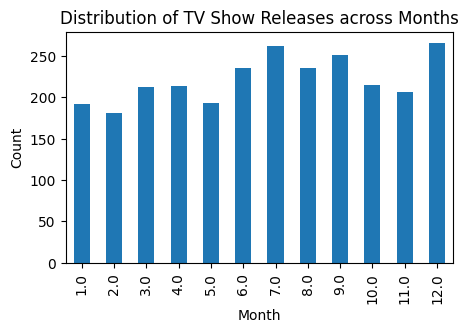

In [19]:
data['month_added'] = pd.to_datetime(data['date_added']).dt.month
tv_shows_per_month = data[data['type'] == 'TV Show']['month_added'].value_counts().sort_index()

plt.figure(figsize=(5, 3))
tv_shows_per_month.plot(kind='bar')
plt.title('Distribution of TV Show Releases across Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

***Analysis of Actors/Directors of Different Types of Shows/Movies***

In [20]:
actor_counts = data['cast'].str.split(', ').explode().value_counts()
director_counts = data['director'].str.split(', ').explode().value_counts()

top_10_actors = actor_counts.head(10)
print("Top 10 Actors:")
print(top_10_actors)

Top 10 Actors:
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: cast, dtype: int64


In [21]:
top_10_directors = director_counts.head(10)
print("\nTop 10 Directors:")
print(top_10_directors)


Top 10 Directors:
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Name: director, dtype: int64


***Focus on TV Shows vs. Movies in Recent Years***

<Figure size 500x300 with 0 Axes>

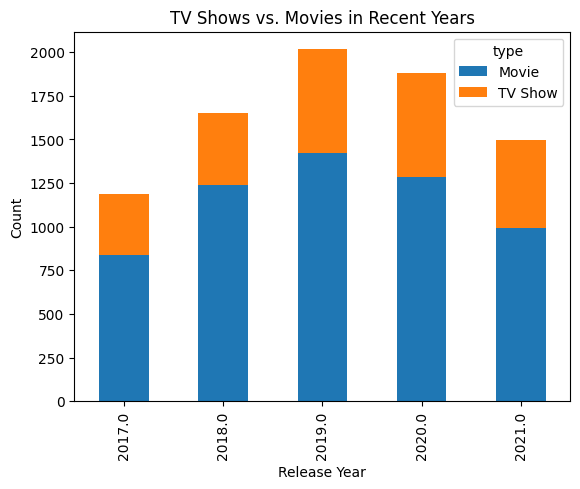

In [22]:
content_per_year = data.groupby(['release_year', 'type']).size().unstack()
recent_years = content_per_year.index[-5:]

plt.figure(figsize=(5, 3))
content_per_year.loc[recent_years].plot(kind='bar', stacked=True)
plt.title('TV Shows vs. Movies in Recent Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# ***NON-GRAPHICAL ANALYSIS: VALUE COUNTS AND UNIQUE ATTRIBUTES***

***Analyzing Content Availability in Different Countries***

In [23]:
content_by_country = data['country'].value_counts()
print("Content Distribution across Countries:")
print(content_by_country)

Content Distribution across Countries:
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64


***Number of Movies Released per Year***

In [24]:
data['release_year'] = pd.to_datetime(data['date_added']).dt.year
movies_per_year = data[data['type'] == 'Movie']['release_year'].value_counts().sort_index()

print("Number of Movies Released per Year:")
print(movies_per_year)

Number of Movies Released per Year:
2008.0       1
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0       6
2014.0      19
2015.0      56
2016.0     253
2017.0     839
2018.0    1237
2019.0    1424
2020.0    1284
2021.0     993
Name: release_year, dtype: int64


***Comparison of TV Shows vs. Movies***

In [25]:
content_types = data['type'].value_counts()

print("Distribution of TV Shows vs. Movies:")
print(content_types)

Distribution of TV Shows vs. Movies:
Movie      6131
TV Show    2676
Name: type, dtype: int64


***Best Time to Launch a TV Show***

In [26]:
data['month_added'] = pd.to_datetime(data['date_added']).dt.month
tv_shows_per_month = data[data['type'] == 'TV Show']['month_added'].value_counts().sort_index()

print("Distribution of TV Show Releases across Months:")
print(tv_shows_per_month)

Distribution of TV Show Releases across Months:
1.0     192
2.0     181
3.0     213
4.0     214
5.0     193
6.0     236
7.0     262
8.0     236
9.0     251
10.0    215
11.0    207
12.0    266
Name: month_added, dtype: int64


***Analysis of Actors/Directors of Different Types of Shows/Movies***

In [27]:
actor_counts = data['cast'].str.split(', ').explode().value_counts()
director_counts = data['director'].str.split(', ').explode().value_counts()
top_10_actors = actor_counts.head(10)
print("Top 10 Actors:")
print(top_10_actors)

Top 10 Actors:
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: cast, dtype: int64


In [28]:
top_10_directors = director_counts.head(10)
print("\nTop 10 Directors:")
print(top_10_directors)


Top 10 Directors:
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Name: director, dtype: int64


***Netflix's Focus on TV Shows vs. Movies in Recent Years***

<Figure size 500x300 with 0 Axes>

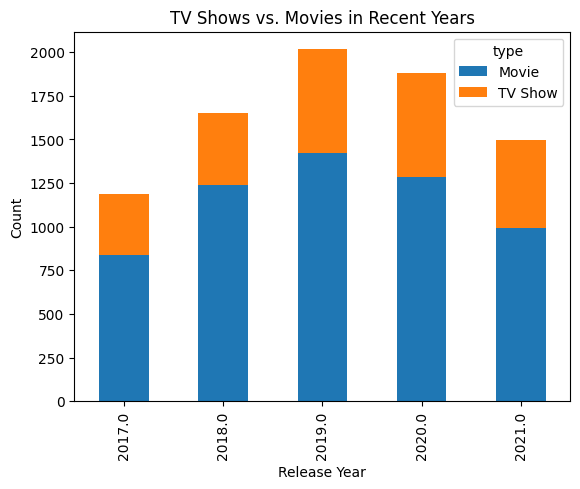

In [29]:
content_per_year = data.groupby(['release_year', 'type']).size().unstack()
recent_years = content_per_year.index[-5:]

plt.figure(figsize=(5, 3))
content_per_year.loc[recent_years].plot(kind='bar', stacked=True)
plt.title('TV Shows vs. Movies in Recent Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# ***VISUAL ANALYSIS - UNIVARIATE, BIVARIATE AFTER PRE-PROCESSING OF THE DATA***

 ***-> For continuous variable(s): Distplot, countplot, histogram for univariate analysis***

***-> For categorical variable(s): Boxplot***

***-> For correlation: Heatmaps, Pairplots***

In [30]:
data['cast'] = data['cast'].str.split(', ')
data['director'] = data['director'].str.split(', ')
data['country'] = data['country'].str.split(', ')

data = data.explode('cast')
data = data.explode('director')
data = data.explode('country')

***Univariate Analysis for Continuous Variables***

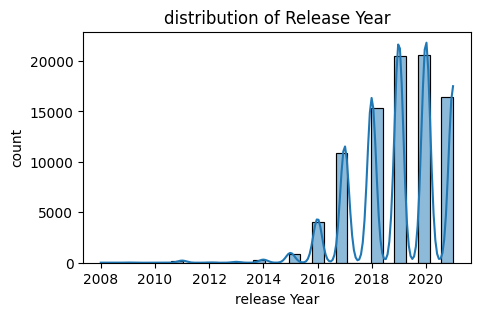

In [31]:
plt.figure(figsize=(5, 3))
sns.histplot(data['release_year'], bins=30, kde=True)
plt.title('distribution of Release Year')
plt.xlabel('release Year')
plt.ylabel('count')
plt.show()

In [32]:
duration_intervals = []
for duration in data['duration']:
    if pd.notnull(duration):
        if 'min' in duration:
            minutes = int(duration.split(' ')[0])
            intervals = minutes // 15
            duration_intervals.append(intervals)
        elif 'h' in duration:
            hours = int(duration.split(' ')[0])
            intervals = hours * 4
            duration_intervals.append(intervals)
    else:
        duration_intervals.append(np.nan)

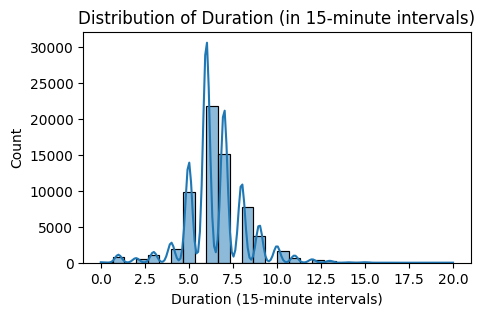

In [33]:
plt.figure(figsize=(5, 3))
sns.histplot(duration_intervals, bins=30, kde=True)
plt.title('Distribution of Duration (in 15-minute intervals)')
plt.xlabel('Duration (15-minute intervals)')
plt.ylabel('Count')
plt.show()

***For categorical variable(s): Boxplot***

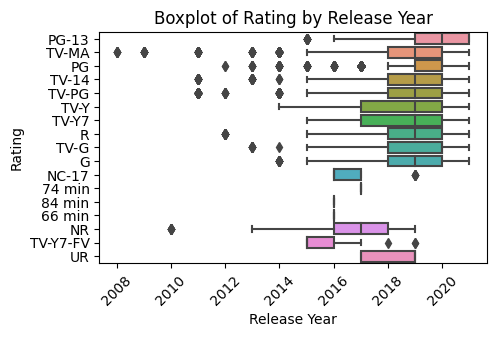

In [34]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='release_year', y='rating', data=data)
plt.title('Boxplot of Rating by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

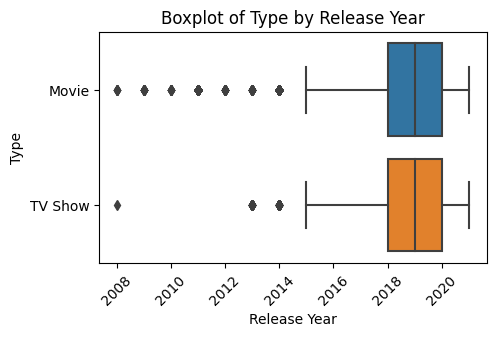

In [35]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='release_year', y='type', data=data)
plt.title('Boxplot of Type by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Type')
plt.xticks(rotation=45)
plt.show()

***For correlation: Heatmaps, Pairplots***

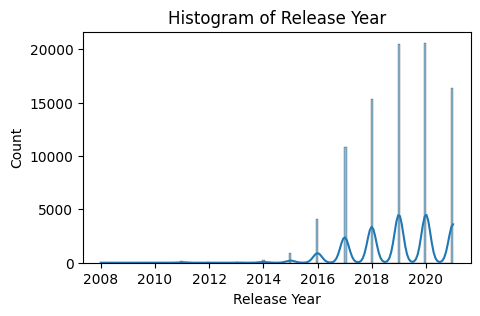

In [36]:
plt.figure(figsize=(5, 3))
sns.histplot(data['release_year'], kde=True)
plt.title('Histogram of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

In [37]:
duration_intervals = []
for duration in data['duration']:
    if pd.notnull(duration):
        if 'min' in duration:
            minutes = int(duration.split(' ')[0])
            intervals = minutes // 15
            duration_intervals.append(intervals)
        elif 'h' in duration:
            hours = int(duration.split(' ')[0])
            intervals = hours * 4
            duration_intervals.append(intervals)
    else:
        duration_intervals.append(np.nan)

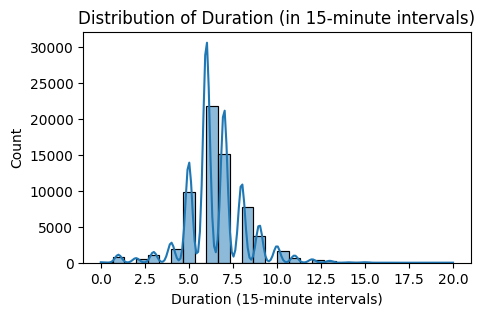

In [38]:
plt.figure(figsize=(5, 3))
sns.histplot(duration_intervals, bins=30, kde=True)
plt.title('Distribution of Duration (in 15-minute intervals)')
plt.xlabel('Duration (15-minute intervals)')
plt.ylabel('Count')
plt.show()

# ***MISSING VALUE & OUTLIER CHECK***



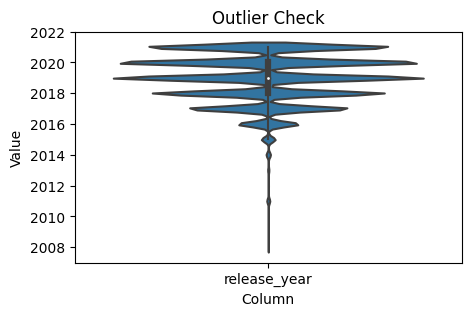

In [39]:
numeric_columns = ['release_year', 'duration']
plt.figure(figsize=(5, 3))
sns.violinplot(data=data[numeric_columns], inner="box")
plt.title('Outlier Check')
plt.ylabel('Value')
plt.xlabel('Column')
plt.show()

# ***INSIGHTS BASED ON NON-GRAPHICAL AND VISUAL ANALYSIS***
***-> Comments on the range of attributes***

***-> Comments on the distribution of the variables and relationship between them***

***->Comments for each univariate and bivariate plot***

In [40]:
range_attributes = data.describe(include='all').transpose()[['min', 'max']]
print("Range of Attributes:\n", range_attributes)

Range of Attributes:
                  min     max
show_id          NaN     NaN
type             NaN     NaN
title            NaN     NaN
director         NaN     NaN
cast             NaN     NaN
country          NaN     NaN
date_added       NaN     NaN
release_year  2008.0  2021.0
rating           NaN     NaN
duration         NaN     NaN
listed_in        NaN     NaN
description      NaN     NaN
month_added      1.0    12.0


In [41]:
variable_distribution = data.describe().transpose()
print("Distribution of Variables:\n", variable_distribution)

Distribution of Variables:
                 count         mean       std     min     25%     50%     75%  \
release_year  89313.0  2018.959827  1.583219  2008.0  2018.0  2019.0  2020.0   
month_added   89313.0     6.623773  3.455234     1.0     4.0     7.0    10.0   

                 max  
release_year  2021.0  
month_added     12.0  


In [42]:
correlation_matrix = data.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
               release_year  month_added
release_year      1.000000    -0.154413
month_added      -0.154413     1.000000


<ipython-input-42-e1102cdf4dd1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


# ***BUSINESS INSIGHTS***

In [43]:
content_by_country = data.groupby('country')['type'].value_counts().unstack()
print("Types of Content Available in Different Countries:\n", content_by_country)

Types of Content Available in Different Countries:
 type          Movie  TV Show
country                     
                8.0      4.0
Afghanistan     1.0      NaN
Albania         4.0      NaN
Algeria        29.0      NaN
Angola         16.0      NaN
...             ...      ...
Vatican City    1.0      NaN
Venezuela      12.0      NaN
Vietnam        50.0      NaN
West Germany   22.0     21.0
Zimbabwe       15.0      NaN

[127 rows x 2 columns]


In [44]:
movies_per_year = data[data['type'] == 'Movie'].groupby('release_year')['type'].count()
print("Number of Movies Released per Year:\n", movies_per_year)

Number of Movies Released per Year:
 release_year
2008.0        6
2009.0       18
2010.0       10
2011.0      200
2012.0       27
2013.0       33
2014.0      223
2015.0      675
2016.0     2295
2017.0     7970
2018.0    11950
2019.0    15420
2020.0    14844
2021.0    11675
Name: type, dtype: int64


In [45]:
content_comparison = data['type'].value_counts()
print("Comparison of TV Shows vs. Movies:\n", content_comparison)

Comparison of TV Shows vs. Movies:
 Movie      65346
TV Show    24036
Name: type, dtype: int64


In [46]:
tv_shows_by_month = data[data['type'] == 'TV Show']['date_added'].apply(lambda x: pd.to_datetime(x).month).value_counts().sort_index()
print("Number of TV Shows Added by Month:\n", tv_shows_by_month)

Number of TV Shows Added by Month:
 1.0     2146
2.0     1684
3.0     1808
4.0     1892
5.0     1897
6.0     2078
7.0     2182
8.0     2310
9.0     2047
10.0    1743
11.0    1936
12.0    2244
Name: date_added, dtype: int64


In [47]:
actors_counts = data['cast'].str.split(', ').explode().value_counts()
print("Top Actors:\n", actors_counts.head())

Top Actors:
 Alfred Molina     85
Liam Neeson       82
John Krasinski    67
Salma Hayek       66
Frank Langella    66
Name: cast, dtype: int64


In [48]:
directors_counts = data['director'].str.split(', ').explode().value_counts()
print("Top Directors:\n", directors_counts.head())

Top Directors:
 Martin Scorsese     217
Steven Spielberg    205
Raja Gosnell        154
Martin Campbell     154
Youssef Chahine     150
Name: director, dtype: int64


In [49]:
focus_comparison = data[data['release_year'] >= 2010]['type'].value_counts()
print("Comparison of TV Shows vs. Movies (Recent Years):\n", focus_comparison)

Comparison of TV Shows vs. Movies (Recent Years):
 Movie      65322
TV Show    23966
Name: type, dtype: int64
